In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import scipy.signal as scisig
import scipy.optimize as opt

In [4]:
PSDyz_l = []
PSDx_l = []
PSDfb_l = []
fbl = []
xl = []
yzl = []
for i in range(1, 140):
    filename = 'D:\\Experiment\\Pumping\\231109\\Temperature\\tt ('+str(i)+').mat'
    data = sio.loadmat(filename)
    Tint = data['Tinterval'][0][0]
    z = np.transpose(data['B'])[0]
    x = np.transpose(data['A'])[0]
    fb = np.transpose(data['H'])[0]
    for i in range(2):
        PSDz = scisig.welch(z[i*10*int(1/Tint):(i+1)*10*int(1/Tint)], nperseg = int(1/Tint)/10, fs = int(1/Tint))
        PSDyz_l.append(PSDz[1])
        PSDx = scisig.welch(x[i*10*int(1/Tint):(i+1)*10*int(1/Tint)], nperseg = int(1/Tint)/10, fs = int(1/Tint))
        PSDx_l.append(PSDx[1])
        PSDfb = scisig.welch(fb[i*10*int(1/Tint):(i+1)*10*int(1/Tint)], nperseg = int(1/Tint)/10, fs = int(1/Tint))
        PSDfb_l.append(PSDfb[1])
        fbm = np.mean(fb[i*10*int(1/Tint):(i+1)*10*int(1/Tint)])
        fbl.append(fbm)
        xm = np.mean(x[i*10*int(1/Tint):(i+1)*10*int(1/Tint)])
        xl.append(xm)
        yzm = np.mean(z[i*10*int(1/Tint):(i+1)*10*int(1/Tint)])
        yzl.append(yzm)
freq = PSDz[0]

Text(0, 0.5, 'Time (mins)')

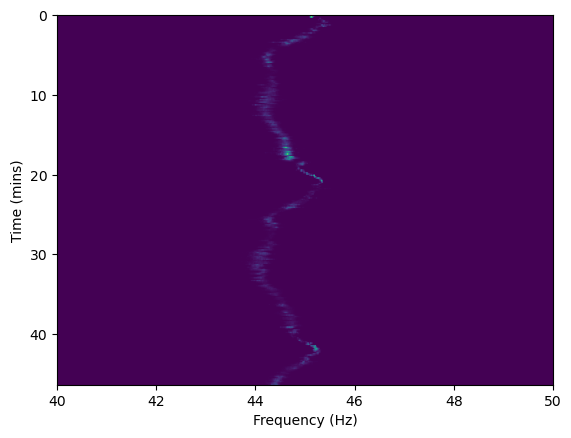

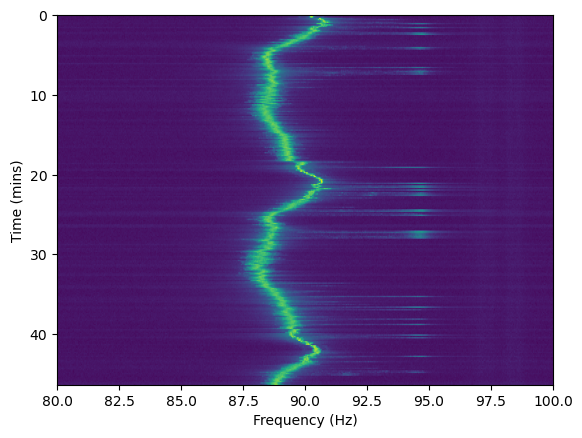

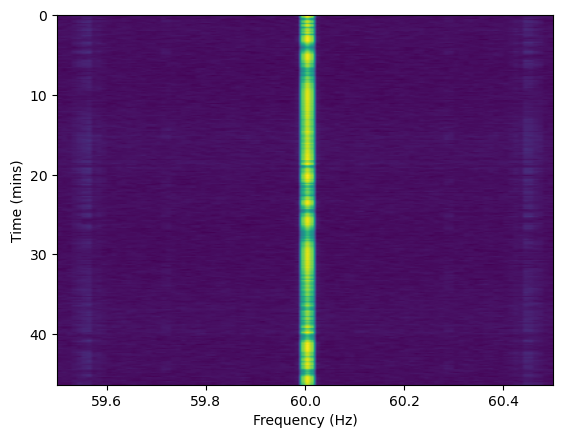

In [5]:
lb = 4000
ub = 5000
plt.figure()
plt.imshow(np.array(PSDyz_l)[:,lb:ub], extent = [40, 50, 10*len(PSDfb_l)/60, 0], aspect = 'auto')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Time (mins)')
plt.figure()
lb = 4000*2
ub = 5000*2
plt.imshow(np.log(np.array(PSDfb_l)[:,lb:ub:2]), extent = [80, 100, 10*len(PSDfb_l)/60, 0], aspect = 'auto')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Time (mins)')
lb = 5950
ub = 6050
plt.figure()
plt.imshow(np.log(np.array(PSDyz_l)[:,lb:ub]), extent = [59.5, 60.5, 10*len(PSDfb_l)/60, 0], aspect = 'auto')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Time (mins)')

Text(0, 0.5, 'Time (mins)')

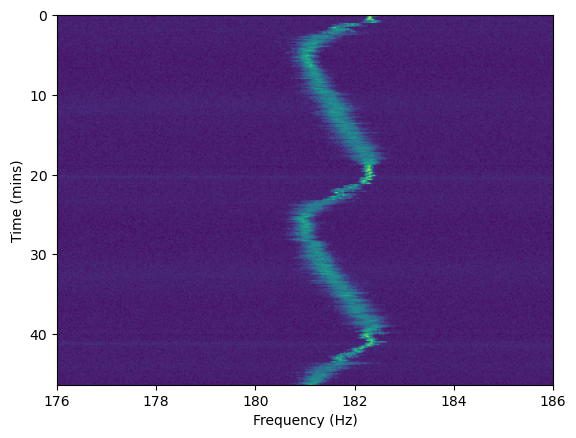

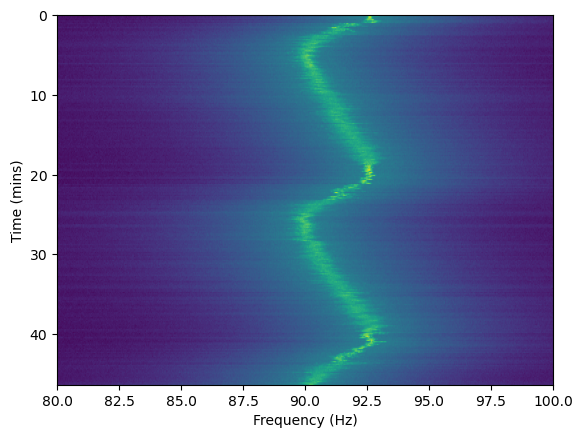

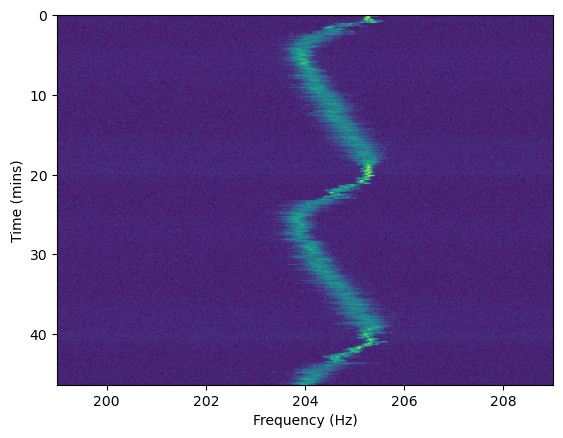

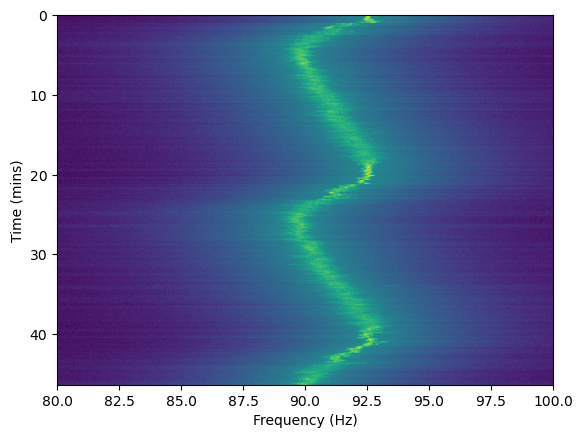

In [6]:

lb = 17600
ub = 18600
plt.figure()
plt.imshow(np.log(np.array(PSDyz_l)[:,lb:ub]), extent = [176, 186, 10*len(PSDfb_l)/60, 0], aspect = 'auto')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Time (mins)')
plt.figure()
lb = 17600*2
ub = 18600*2
plt.imshow(np.log(np.array(PSDfb_l)[:,lb:ub:2]), extent = [80, 100, 10*len(PSDfb_l)/60, 0], aspect = 'auto')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Time (mins)')
lb = 19900
ub = 20900
plt.figure()
plt.imshow(np.log(np.array(PSDx_l)[:,lb:ub]), extent = [199, 209, 10*len(PSDfb_l)/60, 0], aspect = 'auto')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Time (mins)')
plt.figure()
lb = 19900*2
ub = 20900*2
plt.imshow(np.log(np.array(PSDfb_l)[:,lb:ub:2]), extent = [80, 100, 10*len(PSDfb_l)/60, 0], aspect = 'auto')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Time (mins)')

Text(0.5, 0, 'Time (mins)')

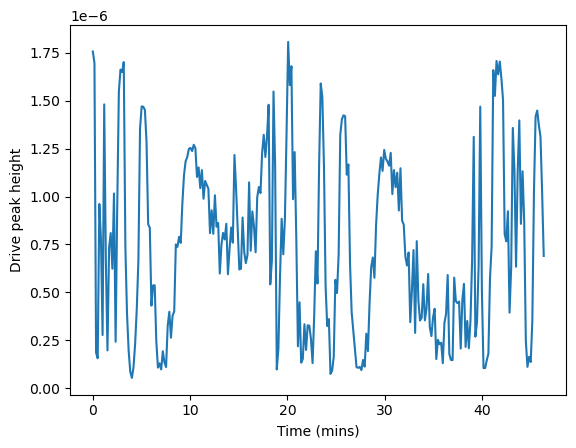

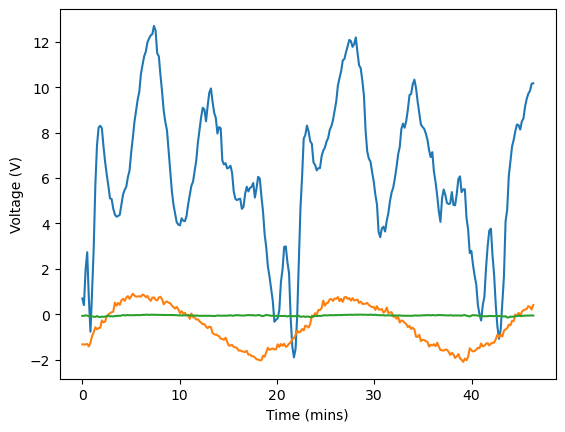

In [11]:
plt.plot(np.linspace(0, 10*len(PSDfb_l)/60, len(PSDfb_l)), np.array(PSDyz_l)[:,6000])
plt.ylabel('Drive peak height')
plt.xlabel('Time (mins)')
plt.figure()
plt.plot(np.linspace(0, 10*len(PSDfb_l)/60, len(PSDfb_l)),fbl)
plt.plot(np.linspace(0, 10*len(PSDfb_l)/60, len(PSDfb_l)),xl)
plt.plot(np.linspace(0, 10*len(PSDfb_l)/60, len(PSDfb_l)),yzl)
plt.ylabel('Voltage (V)')
plt.xlabel('Time (mins)')

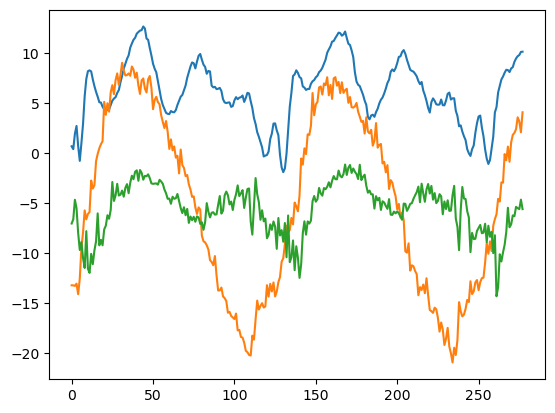

In [10]:
plt.plot(fbl)
plt.plot(np.array(xl)*10)
plt.plot(np.array(yzl)*100)

In [12]:
import pandas as pd

In [14]:
df = pd.read_csv('D:\\Experiment\\Pumping\\231109\\Temperature\\Temp.csv', delimiter = ';')

# Time [s];Date;Time;Temperature[C];Humidity[%];TH1[C];TH2[C]

T1 = list(df['TH1[C]'])
T2 = list(df['Temperature[C]'])
timeT = np.array(df['Time [s]'])

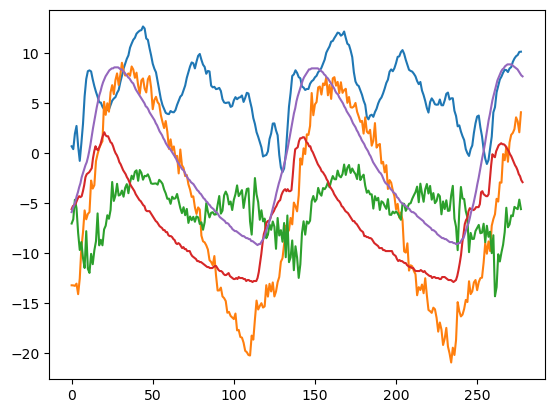

In [20]:
plt.plot(fbl)
plt.plot(np.array(xl)*10)
plt.plot(np.array(yzl)*100)
plt.plot(np.linspace(0, len(xl), len(T1)),(np.array(T1)-24)*10)
plt.plot(np.linspace(0, len(xl), len(T2)),(np.array(T2)-24)*10)

In [21]:
### Next day

In [36]:
zl = []
yzl = []
xl = []
for i in range(1, 141):
    filename = 'D:\\Experiment\\Pumping\\231110\\Pumped\\tt ('+str(i)+').mat'
    data = sio.loadmat(filename)
    Tint = data['Tinterval'][0][0]
    z = np.transpose(data['C'])[0]
    x= np.transpose(data['A'])[0]
    yz = np.transpose(data['B'])[0]
    for i in range(2):
        zm = np.mean(z[i*10*int(1/Tint):(i+1)*10*int(1/Tint)])
        zl.append(zm)
        xm = np.mean(x[i*10*int(1/Tint):(i+1)*10*int(1/Tint)])
        xl.append(xm)
        yzm = np.mean(yz[i*10*int(1/Tint):(i+1)*10*int(1/Tint)])
        yzl.append(yzm)

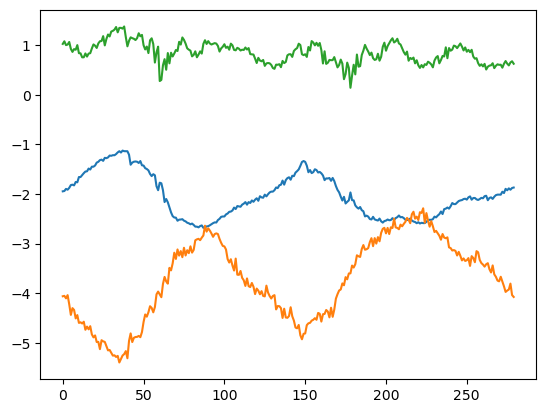

In [37]:
plt.plot(zl)
plt.plot(np.array(xl))
plt.plot(np.array(yzl)*10)

In [38]:
PSDyz_l = []
for i in range(1, 141):
    filename = 'D:\\Experiment\\Pumping\\231110\\Pumped\\tt ('+str(i)+').mat'
    data = sio.loadmat(filename)
    Tint = data['Tinterval'][0][0]
    z = np.transpose(data['B'])[0]
    for i in range(2):
        PSDz = scisig.welch(z[i*10*int(1/Tint):(i+1)*10*int(1/Tint)], nperseg = int(1/Tint)/10, fs = int(1/Tint))
        PSDyz_l.append(PSDz[1])
freq = PSDz[0]

Text(0.5, 0, 'Time (mins)')

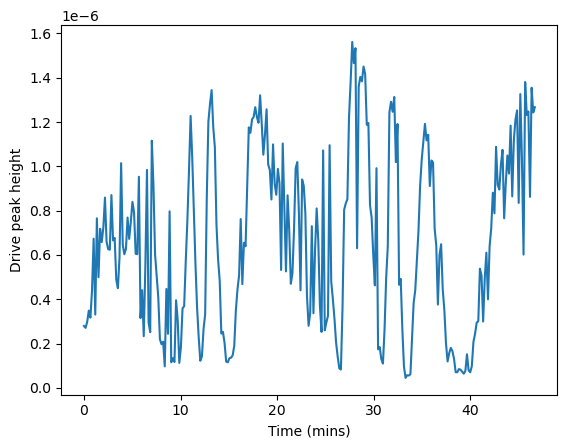

In [40]:
plt.plot(np.linspace(0, 10*len(PSDyz_l)/60, len(PSDyz_l)), np.array(PSDyz_l)[:,6000])
plt.ylabel('Drive peak height')
plt.xlabel('Time (mins)')

In [62]:
zl = []
yzl = []
PSDyz_l = []
freq = PSDz[0]
for i in range(1, 125):
    filename = 'D:\\Experiment\\Pumping\\231110\\Pumped 3\\tt ('+str(i)+').mat'
    data = sio.loadmat(filename)
    Tint = data['Tinterval'][0][0]
    z = np.transpose(data['C'])[0]
    yz = np.transpose(data['B'])[0]
    for i in range(2):
        zm = np.mean(z[i*10*int(1/Tint):(i+1)*10*int(1/Tint)])
        zl.append(zm)
        yzm = np.mean(yz[i*10*int(1/Tint):(i+1)*10*int(1/Tint)])
        yzl.append(yzm)
        PSDz = scisig.welch(yz[i*10*int(1/Tint):(i+1)*10*int(1/Tint)], nperseg = int(1/Tint)/10, fs = int(1/Tint))
        PSDyz_l.append(PSDz[1])

Text(0.5, 0, 'Time (mins)')

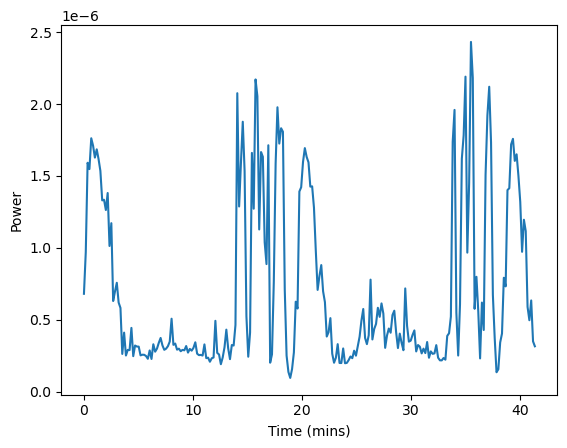

In [90]:
plt.plot(np.linspace(0, 10*len(PSDyz_l)/60, len(PSDyz_l)), np.array(PSDyz_l)[:,6000])#/np.mean(np.array(PSDyz_l)[:,6000]))
#plt.plot(np.linspace(0, 10*len(PSDyz_l)/60, len(PSDyz_l)), np.array(zl)/np.mean(zl))
plt.ylabel('Power')
plt.xlabel('Time (mins)')
#plt.yscale('log')

<Figure size 640x480 with 0 Axes>

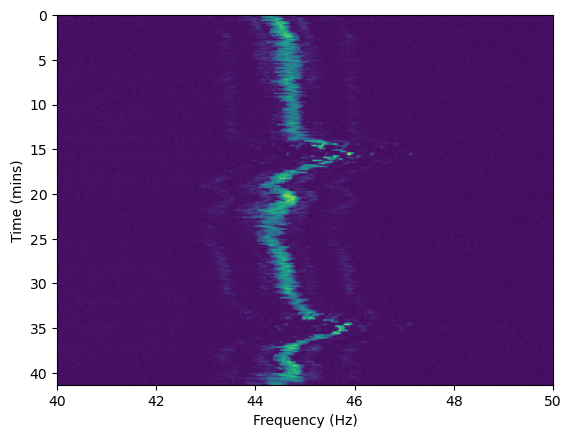

<Figure size 640x480 with 0 Axes>

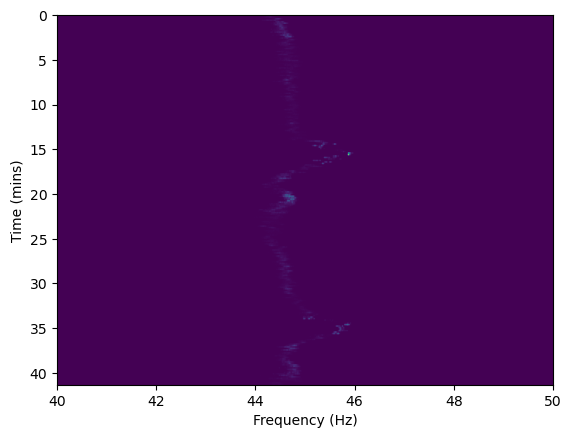

<Figure size 640x480 with 0 Axes>

In [89]:
lb = 4000
ub = 5000
plt.figure()
plt.imshow(np.log(np.array(PSDyz_l))[:,lb:ub], extent = [40, 50, 10*len(PSDyz_l)/60, 0], aspect = 'auto')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Time (mins)')
plt.figure()
lb = 4000
ub = 5000
plt.figure()
plt.imshow(np.array(PSDyz_l)[:,lb:ub], extent = [40, 50, 10*len(PSDyz_l)/60, 0], aspect = 'auto')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Time (mins)')
plt.figure()

Text(0, 0.5, 'Time (mins)')

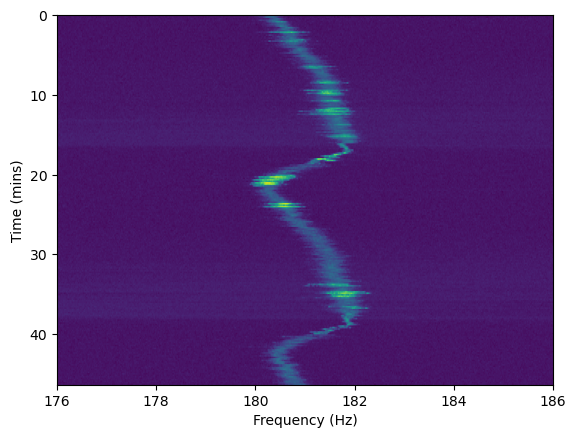

In [65]:
lb = 17600
ub = 18600
plt.figure()
plt.imshow(np.log(np.array(PSDyz_l)[:,lb:ub]), extent = [176, 186, 10*len(PSDfb_l)/60, 0], aspect = 'auto')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Time (mins)')